<a href="https://colab.research.google.com/github/sangeethapk/AI-ML/blob/main/FVPredict_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kritikseth_fruit_and_vegetable_image_recognition_path = kagglehub.dataset_download('kritikseth/fruit-and-vegetable-image-recognition')

print('Data source import complete.')


Using Colab cache for faster access to the 'fruit-and-vegetable-image-recognition' dataset.
Data source import complete.


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")


In [ ]:
base_dir = '/kaggle/input/fruit-and-vegetable-image-recognition'

In [ ]:
train_path = os.path.join(base_dir , 'train')
test_path = os.path.join(base_dir , 'test')
validation_path = os.path.join(base_dir , 'validation')


# Dataset Image Visualiztion

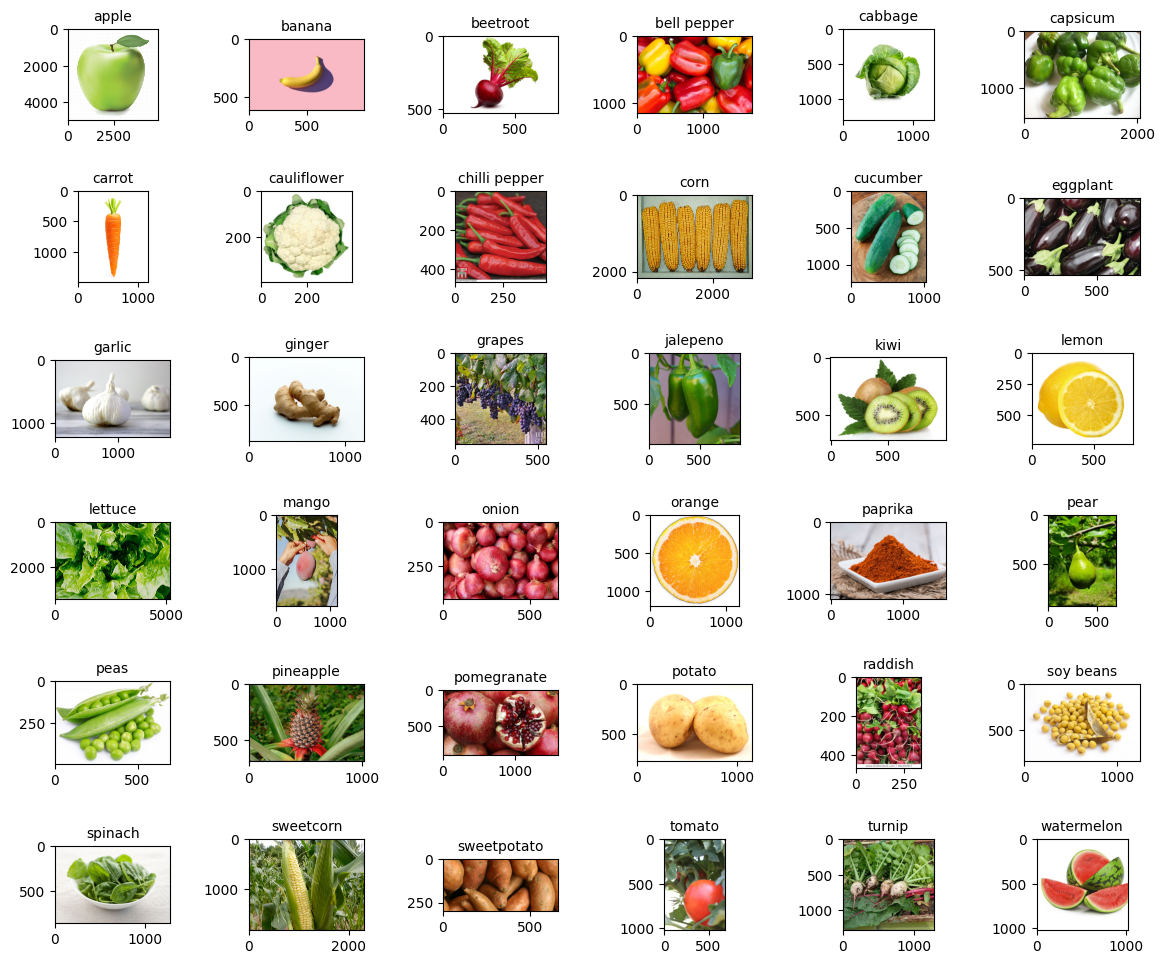

In [ ]:
categories = sorted(os.listdir(train_path))

sample_images = []
for category in categories:
    category_path = os.path.join(train_path, category)
    first_image = os.listdir(category_path)[0]
    sample_images.append(os.path.join(category_path , first_image))


fig , axes =plt.subplots(nrows =6 ,ncols=6 ,figsize=(12,10))

for ax, img_path , label in zip(axes.flat , sample_images , categories) :
    ax.imshow(plt.imread(img_path))
    ax.set_title(label , fontsize =10)


plt.tight_layout(pad =2)
plt.show()

# Number of images per class

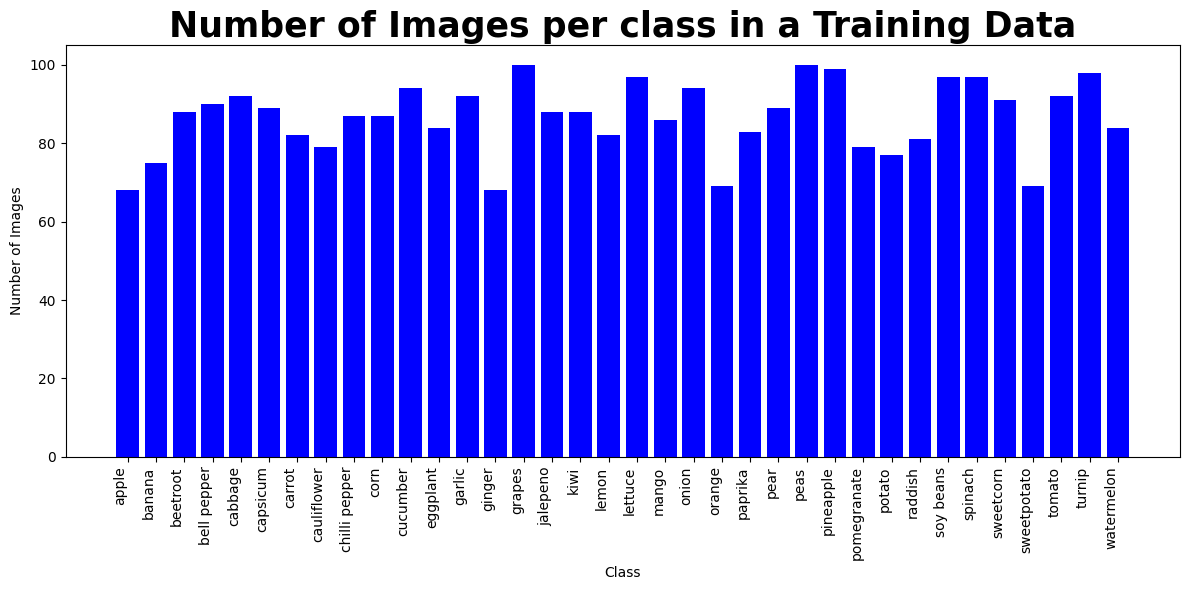

In [ ]:
classes = sorted (os.listdir(train_path))

image_count ={}
for cls in classes:
    class_path= os.path.join(train_path,cls)
    image_count[cls]=len(os.listdir(class_path))

plt.figure(figsize=(12,6))
plt.bar(image_count.keys() ,image_count.values(), color ='blue')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per class in a Training Data', fontsize = 25, fontweight ='bold')
plt.xticks(rotation =90 , ha = 'right')
plt.tight_layout()
plt.show()

# Loading Data in Batches

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size =(224,224) ,
    batch_size = 32 ,
    seed = 42
)


val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_path,
    image_size =(224,224) ,
    batch_size = 32 ,
    seed = 42
)

Found 3115 files belonging to 36 classes.
Found 351 files belonging to 36 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(3,3),input_shape=(224,224,3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Conv2D(32,kernel_size =(3,3),input_shape=(224,224,3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32,kernel_size =(3,3),input_shape=(224,224,3), padding ='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32,kernel_size =(3,3),input_shape=(224,224,3), padding ='same'))


model.add(Conv2D(32,kernel_size =(3,3),input_shape=(224,224,3), padding ='same'))



model.add(Flatten())

model.add(Dense(256 ,activation ='relu'))
model.add(Dropout(0,3))

model.add(Dense(36 ,activation ='softmax'))

model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy' ,
    metrics = ['accuracy']
)


#model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 224, 224, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         9,252 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,470,308 (24.68 MB)

 Trainable params: 6,470,116 (24.68 MB)

 Non-trainable params: 192 (768.00 B)

# Training the Model with EarlyStopping

In [ ]:
callbacks=[
    EarlyStopping(
        monitor="val_loss",
        patience=5,
        restore_best_weights=True
    )
]

#Train the model
history = model.fit(

    train_dataset,
    epochs=30,
    validation_data=val_dataset,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.1023 - loss: 4.6926 - val_accuracy: 0.1368 - val_loss: 3.9551
Epoch 2/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 503s 5s/step - accuracy: 0.3257 - loss: 2.3783 - val_accuracy: 0.5783 - val_loss: 1.5615
Epoch 3/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 467s 5s/step - accuracy: 0.6017 - loss: 1.3887 - val_accuracy: 0.8006 - val_loss: 0.8366
Epoch 4/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 489s 5s/step - accuracy: 0.8181 - loss: 0.6096 - val_accuracy: 0.9174 - val_loss: 0.3752
Epoch 5/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 465s 5s/step - accuracy: 0.9279 - loss: 0.2303 - val_accuracy: 0.9402 - val_loss: 0.3713
Epoch 6/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 464s 5s/step - accuracy: 0.9673 - loss: 0.1325 - val_accuracy: 0.9430 - val_loss: 0.4007
Epoch 7/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 506s 5s/step - accuracy: 0.9842 - loss: 0.0917 - val_accuracy: 0.9402 - val_loss: 0.4092
Epoch 8/30
98/98 ━━━━━━━━━━━━━━━━━━━━ 508s 5s/step - accuracy: 0.9908 - loss: 0.0631 - val_accuracy: 0.9601 - v

# Plotting Accuracy

In [4]:

plt.plot(history.history["accuracy"] , label="Training Accuracy")
plt.plot(history.history["val_accuracy"] , label="Validation Accuracy")
plt.title("Model Accuracy ")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

NameError: name 'history' is not defined

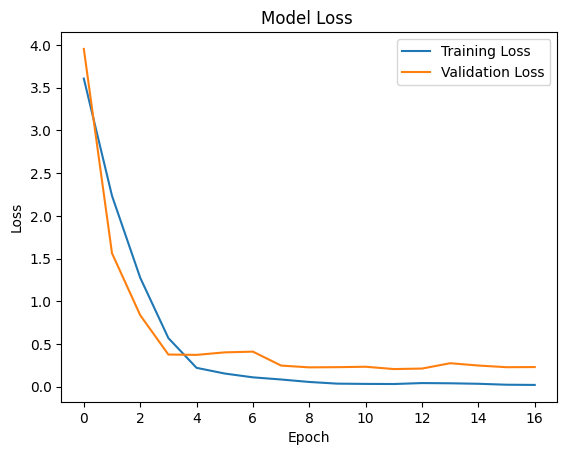

In [ ]:
plt.plot(history.history["loss"] , label="Training Loss")
plt.plot(history.history["val_loss"] , label="Validation Loss")
plt.title("Model Loss ")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()